In [128]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import minmax_scale

from sklearn.cluster import KMeans

In [132]:
# Reading data
trainDf = pd.read_csv ('data/ML-CUP20-TR.csv')

trainNormalized = minmax_scale(trainDf, feature_range=(-1,1), axis=0)
trainDf = pd.DataFrame(trainNormalized)
trainDf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.550522,0.212219,0.026270,-0.189458,-0.136151,0.576014,-0.577201,0.769143,0.617715,-0.607772,0.234938,-0.736188
1,-0.511149,0.070740,0.731692,-0.545219,-0.345643,-0.042165,-0.594915,0.134171,0.510110,-0.390151,0.866585,-0.224639
2,-0.420367,0.415568,0.284060,-0.148601,-0.291042,0.013043,-0.697529,0.146658,0.272767,-0.601677,0.609394,-0.455939
3,-0.466592,0.476000,0.226370,-0.062484,-0.117040,0.224465,-0.234472,1.000000,0.511490,-0.261688,0.198577,-0.764267
4,0.204332,-0.016747,-0.300231,0.591344,0.280833,-0.002217,-0.027154,-0.131278,-0.338128,0.595841,-0.343548,-0.677183
5,-0.745628,0.274119,0.151378,-0.197374,-0.405744,-0.064005,-0.584867,0.671797,0.147947,-0.530837,0.230730,-0.745037
6,-0.510747,-0.031713,0.022754,0.322005,0.036963,0.370148,-0.328377,0.432914,-0.153711,-0.357555,0.089702,-0.835774
7,-0.667282,0.278573,0.402259,-0.434404,-0.318433,0.218369,-0.368681,0.276302,0.419710,-0.665707,0.364102,-0.646213
8,-0.574702,0.392948,0.097059,-0.040869,-0.220769,0.083248,-0.750432,0.387916,0.425373,-0.347971,0.436247,-0.587245
9,0.649302,-0.641284,-0.646825,-0.151746,0.528899,-0.113473,0.100287,-0.664870,-0.565644,0.112307,-0.819171,0.531732


In [133]:

trainX = trainDf.iloc[:, 1:10].values



In [88]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(trainX)
    wcss.append(kmeans.inertia_)

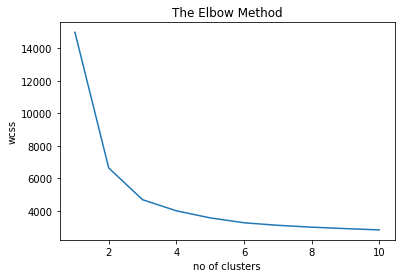

In [89]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [90]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(trainX)


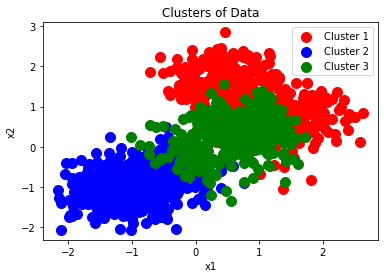

In [91]:

plt.scatter(trainX[y_kmeans == 0, 0], trainX[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(trainX[y_kmeans == 1, 0], trainX[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(trainX[y_kmeans == 2, 0], trainX[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Data Analysis

In [195]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize


In [198]:
# Reading data
trainDf = pd.read_csv ('data/ML-CUP20-TR.csv')
#transformer = normalize().fit(trainDf.values)


trainNormalized = normalize(trainDf.values, axis=0)
#trainDf = pd.DataFrame(transformer.transform(trainDf.values))
trainDf.head(10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
0,-1.227729,0.740105,0.453528,-0.761051,-0.537705,1.471803,-1.143195,2.034647,1.603978,-1.399807,58.616635,-36.878797
1,-1.138424,0.401816,2.186819,-1.827160,-1.051730,-0.465455,-1.186131,0.430193,1.344390,-0.886397,75.310457,-27.210492
2,-0.932510,1.226327,1.086944,-0.638613,-0.917756,-0.292441,-1.434838,0.461744,0.771817,-1.385428,68.513133,-31.582073
3,-1.037358,1.370826,0.945194,-0.380548,-0.490811,0.370115,-0.312516,2.617978,1.347718,-0.583328,57.655634,-37.409493
4,0.484440,0.192628,-0.348715,1.578780,0.485438,-0.340264,0.189964,-0.240548,-0.701919,1.439752,43.327791,-35.763594
5,-1.670272,0.888111,0.760931,-0.784772,-1.199197,-0.533895,-1.161777,1.788671,0.470699,-1.218303,58.505412,-37.046041
6,-1.137512,0.156843,0.444890,0.771650,-0.112940,0.826658,-0.540117,1.185058,-0.257029,-0.809497,54.778188,-38.760972
7,-1.492565,0.898761,1.377372,-1.495082,-0.984964,0.351010,-0.637801,0.789331,1.126307,-1.536488,62.030311,-35.178261
8,-1.282575,1.172241,0.627465,-0.315774,-0.745330,-0.072434,-1.563061,1.071358,1.139968,-0.786885,63.937018,-34.063759
9,1.493726,-1.300688,-1.200331,-0.648039,1.094111,-0.688920,0.498846,-1.588832,-1.250786,0.299001,30.757527,-12.915025


In [199]:
trainDf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,-0.006309,0.020143,0.010106,0.003109,0.005619,0.023872,0.006110,-0.011253,0.007343,0.005921,48.474973,-28.571117
std,1.041026,1.045854,1.040690,1.048153,1.026938,1.054734,1.051558,1.045984,1.034932,1.057754,15.218671,10.269957
min,-2.247241,-2.158406,-2.068117,-3.190003,-2.657307,-3.467126,-2.167943,-2.435643,-2.298636,-2.325151,25.978398,-41.864859
25%,-0.987447,-0.909239,-0.907696,-0.749282,-0.920508,-0.658990,-0.983262,-0.893817,-0.939021,-0.972809,34.666957,-36.935725
50%,0.093405,0.062560,-0.023284,-0.030603,0.172423,-0.120652,0.136528,-0.005085,0.028914,0.208246,45.333403,-30.642449
75%,0.868999,0.894836,0.805138,0.695626,0.854577,0.701555,0.912320,0.783726,0.885435,0.829420,61.544593,-22.860160
max,2.289184,2.623750,2.846079,2.803400,2.250039,2.800493,2.679499,2.617978,2.526212,2.393244,78.836480,-4.064733


In [200]:
trainDf.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
0,-1.227729,0.740105,0.453528,-0.761051,-0.537705,1.471803,-1.143195,2.034647,1.603978,-1.399807,58.616635,-36.878797
1,-1.138424,0.401816,2.186819,-1.827160,-1.051730,-0.465455,-1.186131,0.430193,1.344390,-0.886397,75.310457,-27.210492
2,-0.932510,1.226327,1.086944,-0.638613,-0.917756,-0.292441,-1.434838,0.461744,0.771817,-1.385428,68.513133,-31.582073
3,-1.037358,1.370826,0.945194,-0.380548,-0.490811,0.370115,-0.312516,2.617978,1.347718,-0.583328,57.655634,-37.409493
4,0.484440,0.192628,-0.348715,1.578780,0.485438,-0.340264,0.189964,-0.240548,-0.701919,1.439752,43.327791,-35.763594
5,-1.670272,0.888111,0.760931,-0.784772,-1.199197,-0.533895,-1.161777,1.788671,0.470699,-1.218303,58.505412,-37.046041
6,-1.137512,0.156843,0.444890,0.771650,-0.112940,0.826658,-0.540117,1.185058,-0.257029,-0.809497,54.778188,-38.760972
7,-1.492565,0.898761,1.377372,-1.495082,-0.984964,0.351010,-0.637801,0.789331,1.126307,-1.536488,62.030311,-35.178261
8,-1.282575,1.172241,0.627465,-0.315774,-0.745330,-0.072434,-1.563061,1.071358,1.139968,-0.786885,63.937018,-34.063759
9,1.493726,-1.300688,-1.200331,-0.648039,1.094111,-0.688920,0.498846,-1.588832,-1.250786,0.299001,30.757527,-12.915025


In [201]:
trainDf.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
X1,1.000000,-0.779317,-0.795318,0.443910,0.805125,-0.247087,0.823550,-0.697921,-0.814138,0.746334,-0.864129,0.517869
X2,-0.779317,1.000000,0.714922,-0.230755,-0.709130,0.432254,-0.765879,0.800891,0.767592,-0.606627,0.745059,-0.709556
X3,-0.795318,0.714922,1.000000,-0.415417,-0.775290,0.279116,-0.817269,0.634902,0.831725,-0.696096,0.910257,-0.542976
X4,0.443910,-0.230755,-0.415417,1.000000,0.518018,0.316261,0.443532,-0.146275,-0.383461,0.620423,-0.494997,-0.236579
X5,0.805125,-0.709130,-0.775290,0.518018,1.000000,-0.185964,0.801025,-0.640822,-0.788117,0.775905,-0.841913,0.402707
X6,-0.247087,0.432254,0.279116,0.316261,-0.185964,1.000000,-0.286215,0.524902,0.300696,-0.029313,0.214374,-0.734151
X7,0.823550,-0.765879,-0.817269,0.443532,0.801025,-0.286215,1.000000,-0.692692,-0.825366,0.735525,-0.879582,0.553038
X8,-0.697921,0.800891,0.634902,-0.146275,-0.640822,0.524902,-0.692692,1.000000,0.684177,-0.538734,0.643000,-0.736637
X9,-0.814138,0.767592,0.831725,-0.383461,-0.788117,0.300696,-0.825366,0.684177,1.000000,-0.714041,0.874591,-0.574109
X10,0.746334,-0.606627,-0.696096,0.620423,0.775905,-0.029313,0.735525,-0.538734,-0.714041,1.000000,-0.760795,0.202658


### Heat Map

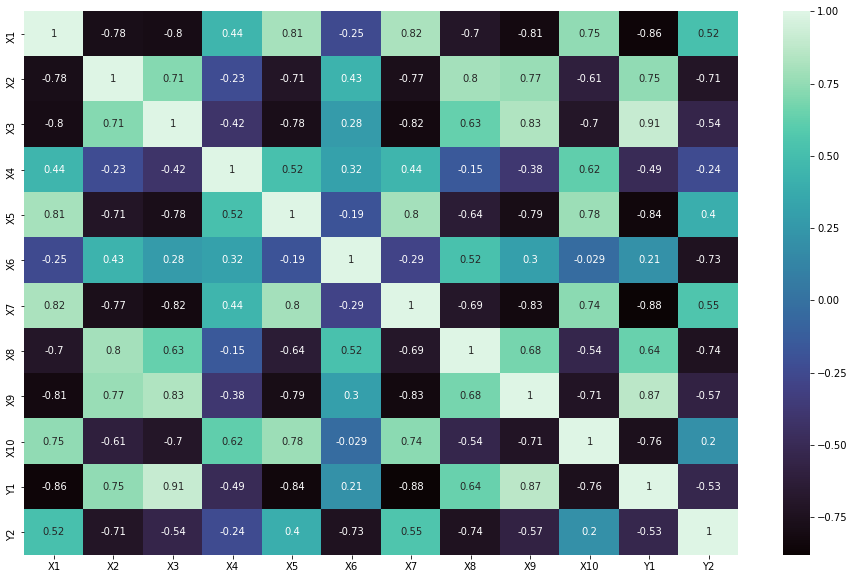

In [202]:

plt.figure(figsize=(16,10))
sns.heatmap(trainDf.corr(), annot=True,cmap="mako")
plt.show()


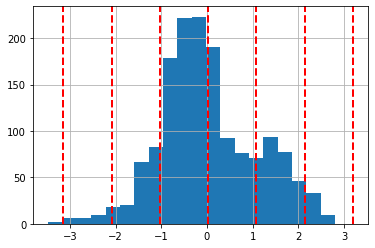

In [205]:
plt.figure()

trainDf['X6'].hist(bins=20)
plt.axvline(trainDf['X6'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()+trainDf['X6'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()+(2*trainDf['X6'].std()), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()+(3*trainDf['X6'].std()), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()-(trainDf['X6'].std()),   color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()-(2*trainDf['X6'].std()), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()-(3*trainDf['X6'].std()), color='r', linestyle='dashed', linewidth=2)


In [107]:
sns.heatmap?


/opt/anaconda3/envs/mlPisa2020/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


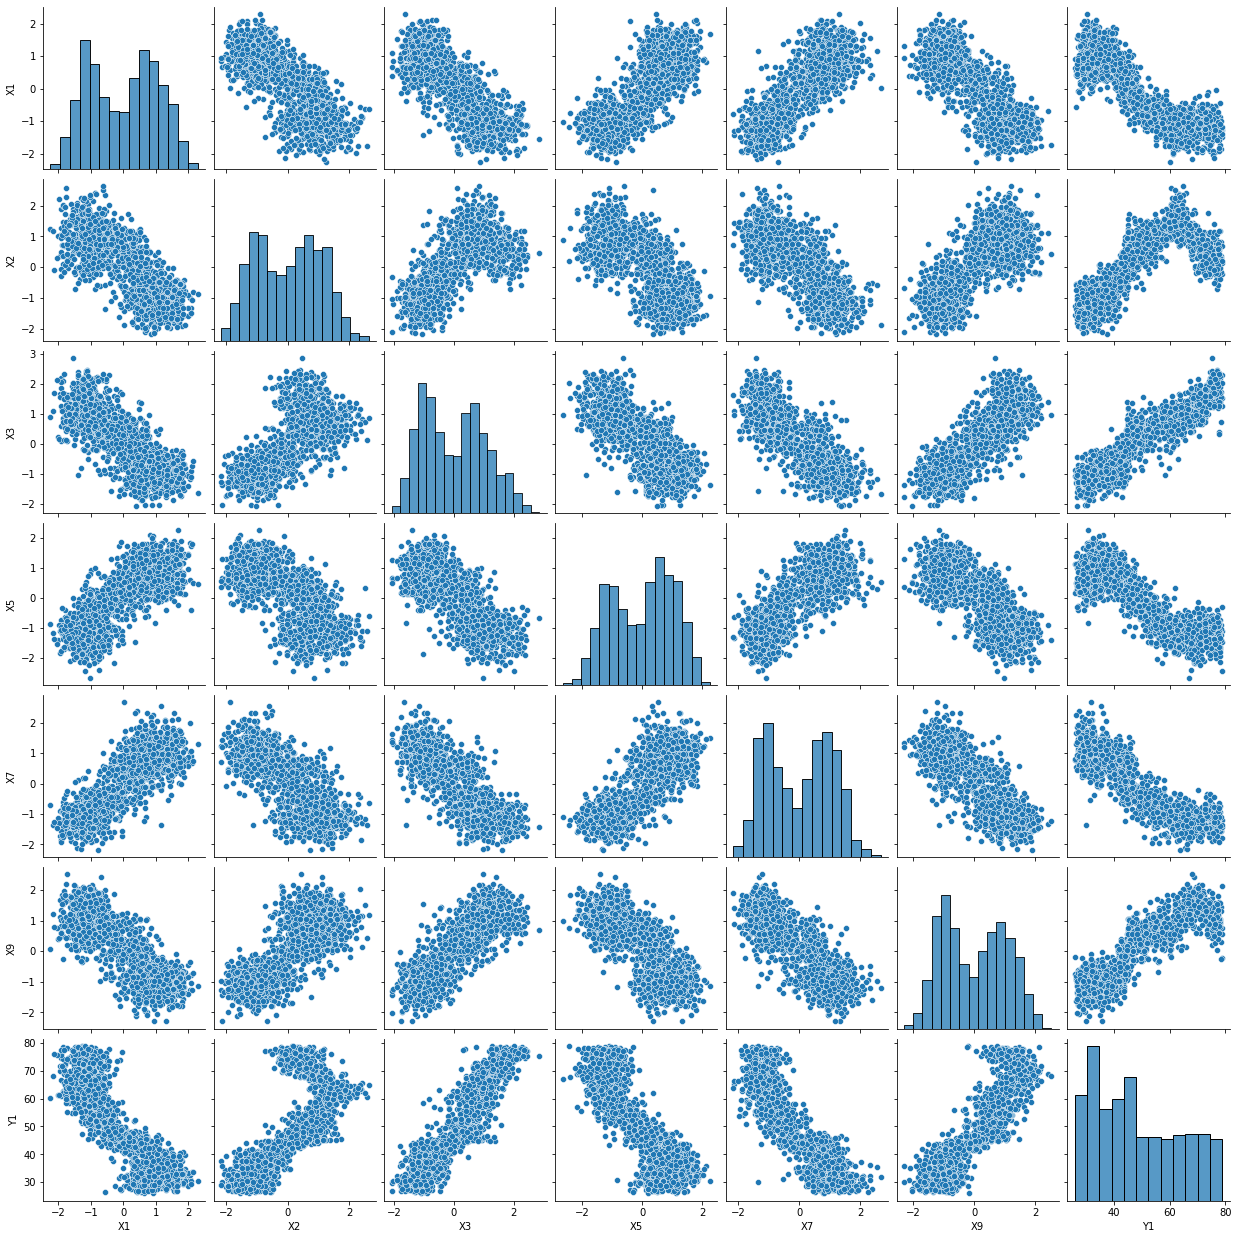

In [110]:

colsY1 = ["X1","X2","X3","X5","X7","X9","Y1"]
sns.pairplot(trainDf[colsY1],size=2.5)
